In [197]:
%matplotlib inline

# import packages for text processing and machine learning
import pandas as pd # dataframe structure and operations
import numpy as np # arrays and numerical processing
import matplotlib.pyplot as plt # 2D plotting
import statsmodels.api as sm # Logistic regression
import statsmodels.formula.api as smf # R-like model specification
import patsy # translat model specification into designed matrices

import seaborn as sns # provides trellis and small multiple plotting


In [198]:
# OBTAIN data from text file in local directory

# read in comma-delimited text file and create data frame
# there are blank character fields for missing data
# read them as character fields initially
coach = pd.read_csv('coaches2.csv', sep = ',', header=0)
print(coach.head())

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


            Name      School Conference TotalSalary  Wins2012  Losses2012  \
0  Steve Addazio      Temple   Big East         NaN       NaN         NaN   
1      Robb Akey       Idaho        WAC   $381,997        1.0        11.0   
2  Gary Andersen  Utah State        WAC   $415,000       11.0         2.0   
3     Chris Ault      Nevada   Mt. West   $493,093        7.0         6.0   
4  David Bailiff        Rice       CUSA   $608,846        7.0         6.0   

   WinPct  CoachTenure  CoachRecord  ProgramTenure  SchoolWinPct  Rank2012  
0     NaN          NaN          NaN            NaN           NaN       NaN  
1   0.083          6.0        0.286           69.0         0.354     118.0  
2   0.846          4.0        0.520           98.0         0.490       9.0  
3   0.538         12.0        0.629           26.0         0.564      58.0  
4   0.538          6.0        0.405           99.0         0.433      58.0  


In [199]:
# Drop Records with missing data
coach = coach[coach['TotalSalary'].notnull()]
coach.head()

,Name,School,Conference,TotalSalary,Wins2012,Losses2012,WinPct,CoachTenure,CoachRecord,ProgramTenure,SchoolWinPct,Rank2012
1,Robb Akey,Idaho,WAC,"$381,997",1.0,11.0,0.083,6.0,0.286,69.0,0.354,118.0
2,Gary Andersen,Utah State,WAC,"$415,000",11.0,2.0,0.846,4.0,0.520,98.0,0.490,9.0
3,Chris Ault,Nevada,Mt. West,"$493,093",7.0,6.0,0.538,12.0,0.629,26.0,0.564,58.0
4,David Bailiff,Rice,CUSA,"$608,846",7.0,6.0,0.538,6.0,0.405,99.0,0.433,58.0
5,Frank Beamer,Virginia Tech,ACC,"$2,428,000",7.0,6.0,0.538,26.0,0.671,109.0,0.609,58.0


In [200]:
# Format data so it's usable (integers instead of character strings)
coach['TotalSalary'] = coach['TotalSalary'].str.replace('$','')
coach['TotalSalary'] = coach['TotalSalary'].str.replace(',','')
coach['TotalSalary'] = coach['TotalSalary'].str.strip()
coach['TotalSalary'] = pd.to_numeric(coach['TotalSalary'])
print(coach.head())
print(coach.describe())
print(coach.columns)

            Name         School Conference  TotalSalary  Wins2012  Losses2012  \
1      Robb Akey          Idaho        WAC       381997       1.0        11.0   
2  Gary Andersen     Utah State        WAC       415000      11.0         2.0   
3     Chris Ault         Nevada   Mt. West       493093       7.0         6.0   
4  David Bailiff           Rice       CUSA       608846       7.0         6.0   
5   Frank Beamer  Virginia Tech        ACC      2428000       7.0         6.0   

   WinPct  CoachTenure  CoachRecord  ProgramTenure  SchoolWinPct  Rank2012  
1   0.083          6.0        0.286           69.0         0.354     118.0  
2   0.846          4.0        0.520           98.0         0.490       9.0  
3   0.538         12.0        0.629           26.0         0.564      58.0  
4   0.538          6.0        0.405           99.0         0.433      58.0  
5   0.538         26.0        0.671          109.0         0.609      58.0  
        TotalSalary    Wins2012  Losses2012      Wi

In [201]:
# attendance in thousands for plotting 
coach['TotalSalary_000'] = coach['TotalSalary']/1000
print(pd.DataFrame.head(coach))

            Name         School Conference  TotalSalary  Wins2012  Losses2012  \
1      Robb Akey          Idaho        WAC       381997       1.0        11.0   
2  Gary Andersen     Utah State        WAC       415000      11.0         2.0   
3     Chris Ault         Nevada   Mt. West       493093       7.0         6.0   
4  David Bailiff           Rice       CUSA       608846       7.0         6.0   
5   Frank Beamer  Virginia Tech        ACC      2428000       7.0         6.0   

   WinPct  CoachTenure  CoachRecord  ProgramTenure  SchoolWinPct  Rank2012  \
1   0.083          6.0        0.286           69.0         0.354     118.0   
2   0.846          4.0        0.520           98.0         0.490       9.0   
3   0.538         12.0        0.629           26.0         0.564      58.0   
4   0.538          6.0        0.405           99.0         0.433      58.0   
5   0.538         26.0        0.671          109.0         0.609      58.0   

   TotalSalary_000  
1          381.997  
2 

In [202]:
## SUMMARY STATISTICS

print("Average Coach Salary: " + str(int(np.mean(coach['TotalSalary'])))) # Average salary
print("Lowest Coach Salary: " + str(np.min(coach['TotalSalary']))) # Lowest salary for a coach
print("Highest Coach Salary: " + str(np.max(coach['TotalSalary']))) # Highest salary for a coach

Average Coach Salary: 1598359
Lowest Coach Salary: 250000
Highest Coach Salary: 5476738


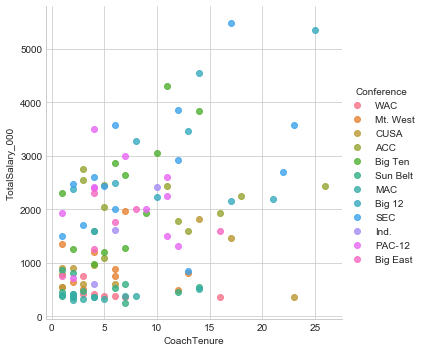

In [203]:
# Line plot of salary by coach tenure
sns.lmplot(x='CoachTenure', y='TotalSalary_000', data=coach, fit_reg=False, hue='Conference')
plt.show()

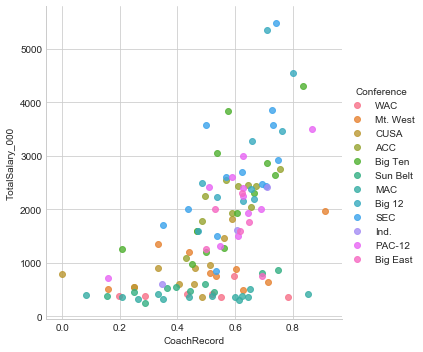

In [204]:
# Line plot of salary by coach record
sns.lmplot(x='CoachRecord', y='TotalSalary_000', data=coach, fit_reg=False, hue='Conference')
plt.show()

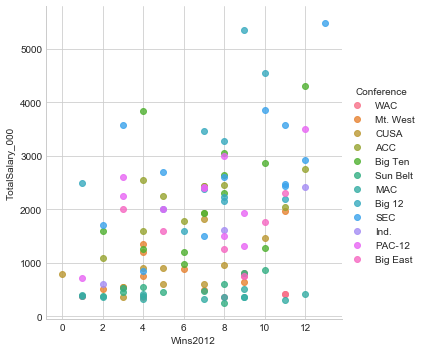

In [205]:
# Line plot of salary by wins
sns.lmplot(x='Wins2012', y='TotalSalary_000', data=coach, fit_reg=False, hue='Conference')
plt.show()

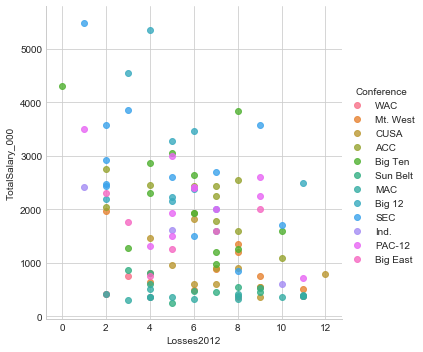

In [206]:
# Line plot of salary by lossess
sns.lmplot(x='Losses2012', y='TotalSalary_000', data=coach, fit_reg=False, hue='Conference')
plt.show()

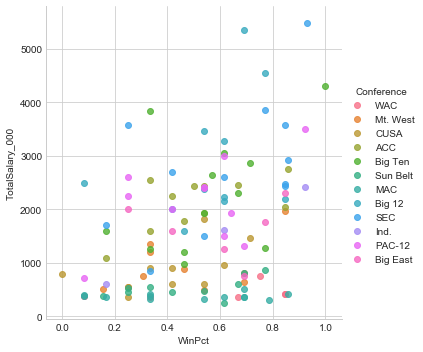

In [207]:
# Line plot of salary by win pct
sns.lmplot(x='WinPct', y='TotalSalary_000', data=coach, fit_reg=False, hue='Conference')
plt.show()

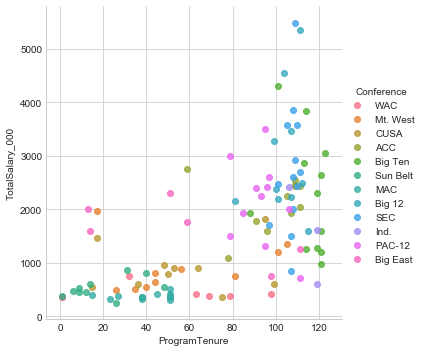

In [208]:
# Line plot of salary by program tenure
sns.lmplot(x='ProgramTenure', y='TotalSalary_000', data=coach, fit_reg=False, hue='Conference')
plt.show()

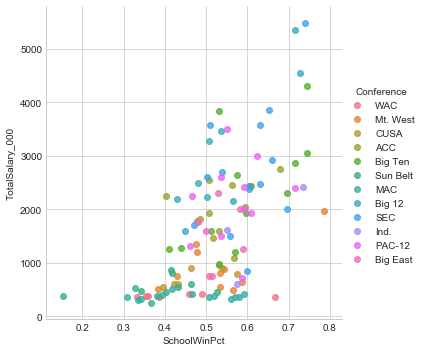

In [209]:
# Line plot of salary by school win percentage
sns.lmplot(x='SchoolWinPct', y='TotalSalary_000', data=coach, fit_reg=False, hue='Conference')
plt.show()

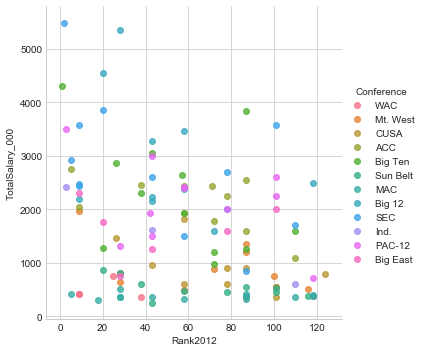

In [210]:
# Line plot of salary by 2012 ranking
sns.lmplot(x='Rank2012', y='TotalSalary_000', data=coach, fit_reg=False, hue='Conference')
plt.show()

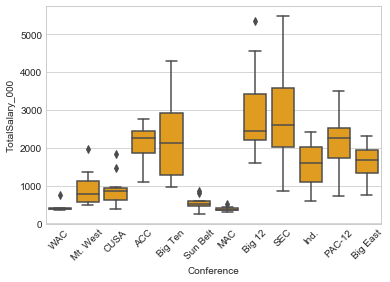

In [211]:
# Box plot of salary by conference
g = sns.boxplot(x="Conference", y="TotalSalary_000", data=coach, color = "orange")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

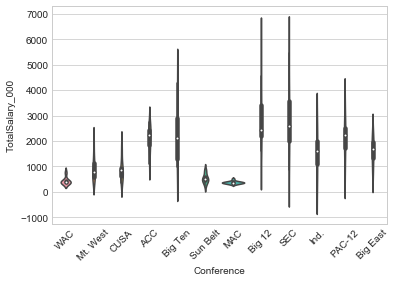

In [212]:
# Violin Plot of Total Salary by Conference

# Set theme (default is darkgrid)
sns.set_style('whitegrid')
 
# Violin plot (alternative to a box plot)
g1 = sns.violinplot(x='Conference', y='TotalSalary_000', data=coach)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

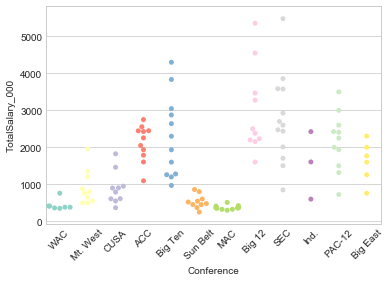

In [213]:
# Swarm Plot of salary by conference
g2 = sns.swarmplot(x='Conference', y='TotalSalary_000', data=coach, 
              palette="Set3")
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
plt.show()

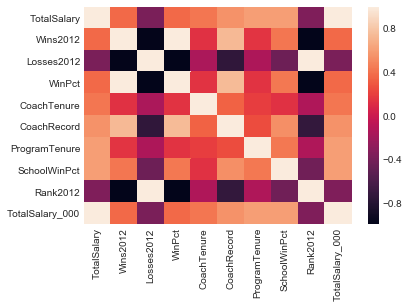

In [214]:
# HEATMAP

# Calculate correlations
corr = coach.corr()
 
# Heatmap
sns.heatmap(corr)
plt.show()

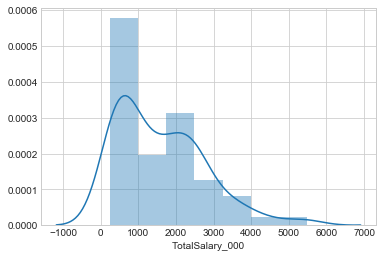

In [215]:
# HISTOGRAM

# Distribution Plot (a.k.a. Histogram)
sns.distplot(coach.TotalSalary_000)
plt.show()

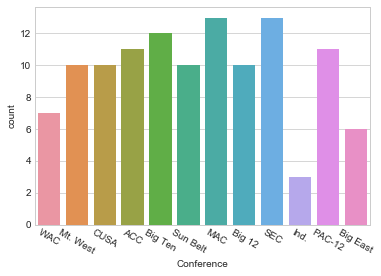

In [216]:
# Count of coaches in conference:
sns.countplot(x='Conference', data=coach)
plt.xticks(rotation=-30)
plt.show()

In [217]:
from scipy.stats import uniform # for training and testing
# employ training-and-test regimen for model validation
np.random.seed(1234)
coach['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coach))
coach_train = coach[coach['runiform'] >= 0.33]
coach_test = coach[coach['runiform'] < 0.33]
# check training data frame
print('\ncoach_train data frame (rows, columns): ',coach_train.shape)
print(coach_train.head())
# check test data frame
print('\ncoach_test data frame (rows, columns): ',coach_test.shape)
print(coach_test.head())

# specify a simple model with bobblehead entered last
my_model = str('TotalSalary ~ Conference + Wins2012 + Losses2012 + WinPct + CoachTenure + CoachRecord + \
               ProgramTenure + SchoolWinPct + Rank2012')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = coach_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coach_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coach_test['predict_salary'] = train_model_fit.predict(coach_test)


coach_train data frame (rows, columns):  (83, 14)
            Name         School Conference  TotalSalary  Wins2012  Losses2012  \
2  Gary Andersen     Utah State        WAC       415000      11.0         2.0   
3     Chris Ault         Nevada   Mt. West       493093       7.0         6.0   
4  David Bailiff           Rice       CUSA       608846       7.0         6.0   
5   Frank Beamer  Virginia Tech        ACC      2428000       7.0         6.0   
8   Bret Bielema      Wisconsin    Big Ten      2640140       8.0         6.0   

   WinPct  CoachTenure  CoachRecord  ProgramTenure  SchoolWinPct  Rank2012  \
2   0.846          4.0        0.520           98.0         0.490       9.0   
3   0.538         12.0        0.629           26.0         0.564      58.0   
4   0.538          6.0        0.405           99.0         0.433      58.0   
5   0.538         26.0        0.671          109.0         0.609      58.0   
8   0.571          7.0        0.739          121.0         0.575      57

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [218]:
# Load in coach data with grad rates
coach_grad = pd.read_csv('Coaches_fgr-gsr.csv', sep = ',', header=0)
print(coach_grad.head())

            Name      School Conference     Salary OtherPay TotalSalary  \
0  Steve Addazio      Temple   Big East        NaN      NaN         NaN   
1      Robb Akey       Idaho        WAC  $375,797   $6,200    $381,997    
2  Gary Andersen  Utah State        WAC  $415,000       $0    $415,000    
3     Chris Ault      Nevada   Mt. West  $493,093       $0    $493,093    
4  David Bailiff        Rice       CUSA  $608,846       NaN   $608,846    

    MaxBonus  FGR  GSR  
0        NaN  60%  79%  
1  $158,262   23%  41%  
2  $150,000   56%  84%  
3   $30,000   89%  96%  
4        NaN  89%  96%  


In [219]:
# Drop Records with missing data
coach_grad = coach_grad[coach_grad['TotalSalary'].notnull()]
coach_grad.head()

,Name,School,Conference,Salary,OtherPay,TotalSalary,MaxBonus,FGR,GSR
1,Robb Akey,Idaho,WAC,"$375,797","$6,200","$381,997","$158,262",23%,41%
2,Gary Andersen,Utah State,WAC,"$415,000",$0,"$415,000","$150,000",56%,84%
3,Chris Ault,Nevada,Mt. West,"$493,093",$0,"$493,093","$30,000",89%,96%
4,David Bailiff,Rice,CUSA,"$608,846",NaN,"$608,846",NaN,89%,96%
5,Frank Beamer,Virginia Tech,ACC,"$2,343,000","$85,000","$2,428,000","$407,500",62%,71%


In [220]:
# Cut unimportant columns from coach_grad:
cols_to_keep = ['Name', 'School', 'Conference', 'TotalSalary', 'FGR', 'GSR']
coach_grad = coach_grad[cols_to_keep]
print(coach_grad.head())

            Name         School Conference  TotalSalary  FGR  GSR
1      Robb Akey          Idaho        WAC    $381,997   23%  41%
2  Gary Andersen     Utah State        WAC    $415,000   56%  84%
3     Chris Ault         Nevada   Mt. West    $493,093   89%  96%
4  David Bailiff           Rice       CUSA    $608,846   89%  96%
5   Frank Beamer  Virginia Tech        ACC  $2,428,000   62%  71%


In [221]:
# Format data so it's usable (integers instead of character strings)
coach_grad['TotalSalary'] = coach_grad['TotalSalary'].str.replace('$','')
coach_grad['TotalSalary'] = coach_grad['TotalSalary'].str.replace(',','')
coach_grad['TotalSalary'] = coach_grad['TotalSalary'].str.strip()
coach_grad['TotalSalary'] = pd.to_numeric(coach_grad['TotalSalary'])
coach_grad['FGR'] = coach_grad['FGR'].str.replace('%','')
coach_grad['FGR'] = coach_grad['FGR'].str.replace(',','')
coach_grad['FGR'] = coach_grad['FGR'].str.strip()
coach_grad['FGR'] = pd.to_numeric(coach_grad['FGR'])
coach_grad['GSR'] = coach_grad['GSR'].str.replace('%','')
coach_grad['GSR'] = coach_grad['GSR'].str.replace(',','')
coach_grad['GSR'] = coach_grad['GSR'].str.strip()
coach_grad['GSR'] = pd.to_numeric(coach_grad['GSR'])
print(coach_grad.head())
print(coach_grad.describe())
print(coach_grad.columns)

            Name         School Conference  TotalSalary  FGR  GSR
1      Robb Akey          Idaho        WAC       381997   23   41
2  Gary Andersen     Utah State        WAC       415000   56   84
3     Chris Ault         Nevada   Mt. West       493093   89   96
4  David Bailiff           Rice       CUSA       608846   89   96
5   Frank Beamer  Virginia Tech        ACC      2428000   62   71
        TotalSalary         FGR         GSR
count  1.160000e+02  116.000000  116.000000
mean   1.598359e+06   54.844828   68.767241
std    1.165929e+06   15.255279   12.140022
min    2.500000e+05    0.000000   41.000000
25%    5.488250e+05   49.000000   60.750000
50%    1.405823e+06   57.000000   67.000000
75%    2.410954e+06   62.000000   75.000000
max    5.476738e+06   92.000000  100.000000
Index(['Name', 'School', 'Conference', 'TotalSalary', 'FGR', 'GSR'], dtype='object')


In [222]:
# Merge the two data frames together:

cols_to_keep1 = ['Name', 'School', 'Conference', 'TotalSalary', 'Wins2012', 'Losses2012',
       'WinPct', 'CoachTenure', 'CoachRecord', 'ProgramTenure', 'SchoolWinPct',
       'Rank2012', 'TotalSalary_000']
coach_rec_grad = coach[cols_to_keep1].join(coach_grad.ix[:,'FGR':])
coach_rec_grad.head()

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Name,School,Conference,TotalSalary,Wins2012,Losses2012,WinPct,CoachTenure,CoachRecord,ProgramTenure,SchoolWinPct,Rank2012,TotalSalary_000,FGR,GSR
1,Robb Akey,Idaho,WAC,381997,1.0,11.0,0.083,6.0,0.286,69.0,0.354,118.0,381.997,23,41
2,Gary Andersen,Utah State,WAC,415000,11.0,2.0,0.846,4.0,0.520,98.0,0.490,9.0,415.000,56,84
3,Chris Ault,Nevada,Mt. West,493093,7.0,6.0,0.538,12.0,0.629,26.0,0.564,58.0,493.093,89,96
4,David Bailiff,Rice,CUSA,608846,7.0,6.0,0.538,6.0,0.405,99.0,0.433,58.0,608.846,89,96
5,Frank Beamer,Virginia Tech,ACC,2428000,7.0,6.0,0.538,26.0,0.671,109.0,0.609,58.0,2428.000,62,71


In [223]:
# grad rates in decimals since they are a percent:

coach_rec_grad['FGR'] = coach_rec_grad['FGR']/100
coach_rec_grad['GSR'] = coach_rec_grad['GSR']/100
coach_rec_grad.head()

,Name,School,Conference,TotalSalary,Wins2012,Losses2012,WinPct,CoachTenure,CoachRecord,ProgramTenure,SchoolWinPct,Rank2012,TotalSalary_000,FGR,GSR
1,Robb Akey,Idaho,WAC,381997,1.0,11.0,0.083,6.0,0.286,69.0,0.354,118.0,381.997,0.23,0.41
2,Gary Andersen,Utah State,WAC,415000,11.0,2.0,0.846,4.0,0.520,98.0,0.490,9.0,415.000,0.56,0.84
3,Chris Ault,Nevada,Mt. West,493093,7.0,6.0,0.538,12.0,0.629,26.0,0.564,58.0,493.093,0.89,0.96
4,David Bailiff,Rice,CUSA,608846,7.0,6.0,0.538,6.0,0.405,99.0,0.433,58.0,608.846,0.89,0.96
5,Frank Beamer,Virginia Tech,ACC,2428000,7.0,6.0,0.538,26.0,0.671,109.0,0.609,58.0,2428.000,0.62,0.71


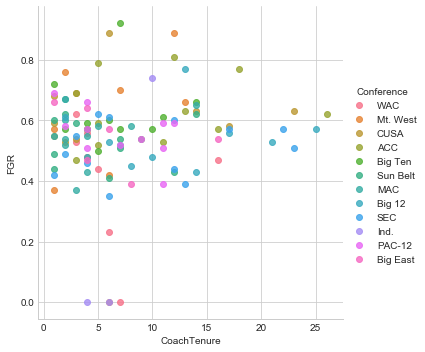

In [224]:
# Line plot of FGR by coach tenure
sns.lmplot(x='CoachTenure', y='FGR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

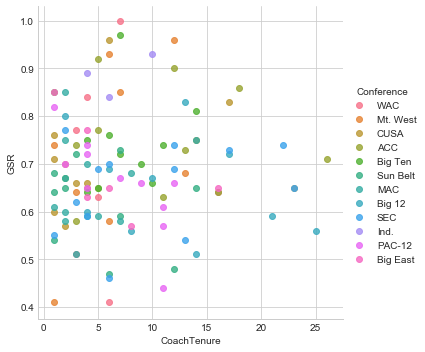

In [225]:
# Line plot of GSR by coach tenure
sns.lmplot(x='CoachTenure', y='GSR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

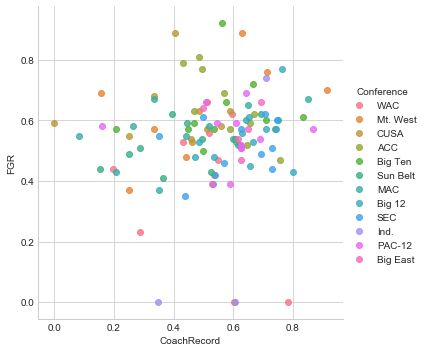

In [226]:
# Line plot of FGR by coach record
sns.lmplot(x='CoachRecord', y='FGR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

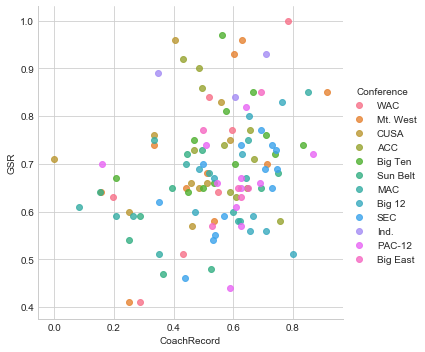

In [227]:
# Line plot of GSR by coach record
sns.lmplot(x='CoachRecord', y='GSR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

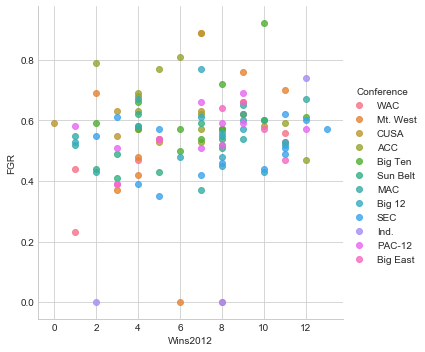

In [228]:
# Line plot of FGR by wins
sns.lmplot(x='Wins2012', y='FGR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

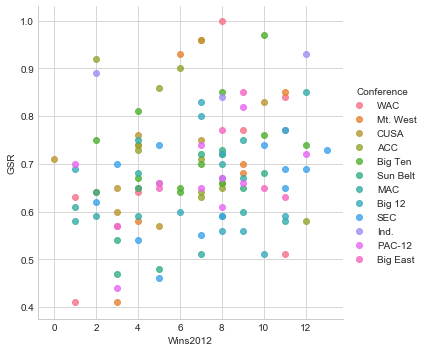

In [229]:
# Line plot of GSR by wins
sns.lmplot(x='Wins2012', y='GSR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

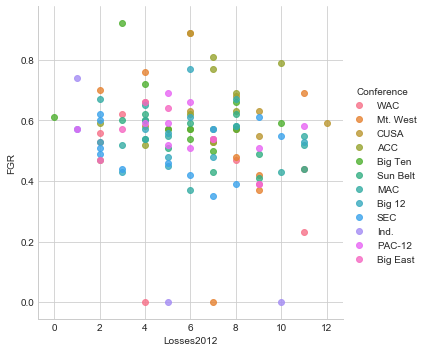

In [230]:
# Line plot of FGR by lossess
sns.lmplot(x='Losses2012', y='FGR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

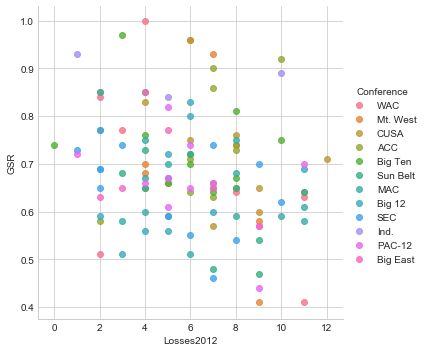

In [231]:
# Line plot of GSR by lossess
sns.lmplot(x='Losses2012', y='GSR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

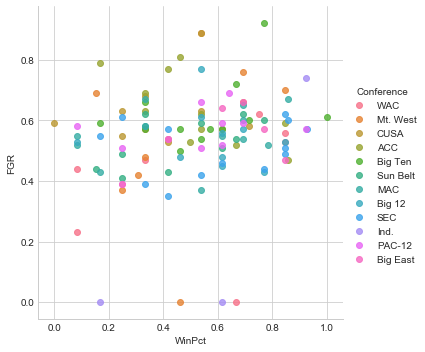

In [232]:
# Line plot of FGR by win pct
sns.lmplot(x='WinPct', y='FGR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

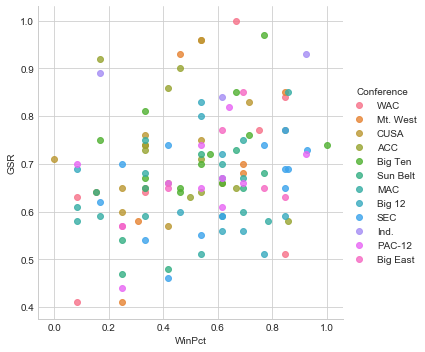

In [233]:
# Line plot of GSR by win pct
sns.lmplot(x='WinPct', y='GSR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

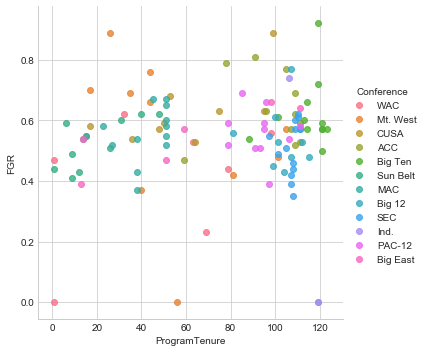

In [234]:
# Line plot of FGR by program tenure
sns.lmplot(x='ProgramTenure', y='FGR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

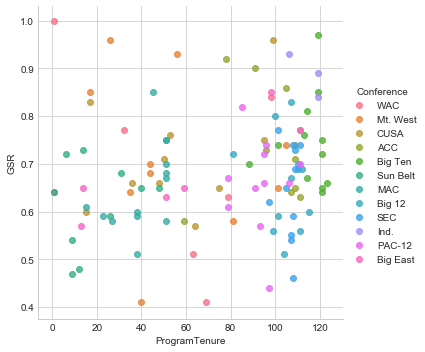

In [235]:
# Line plot of GSR by program tenure
sns.lmplot(x='ProgramTenure', y='GSR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

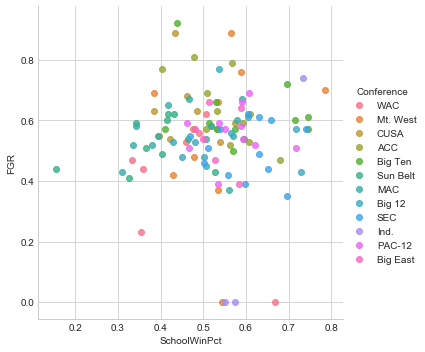

In [236]:
# Line plot of FGR by school win percentage
sns.lmplot(x='SchoolWinPct', y='FGR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

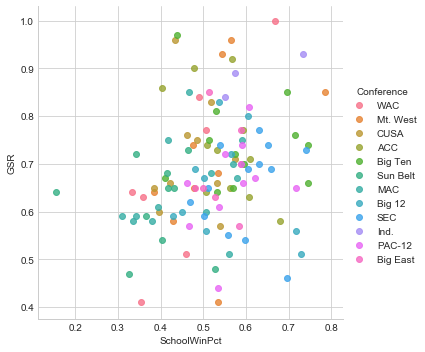

In [237]:
# Line plot of GSR by school win percentage
sns.lmplot(x='SchoolWinPct', y='GSR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

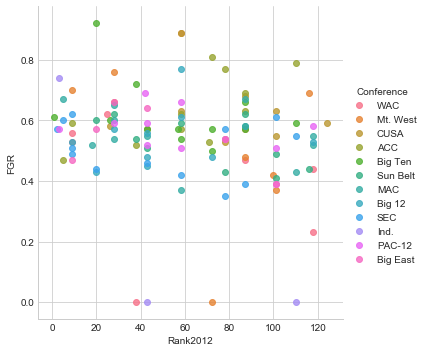

In [238]:
# Line plot of FGR by 2012 ranking
sns.lmplot(x='Rank2012', y='FGR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

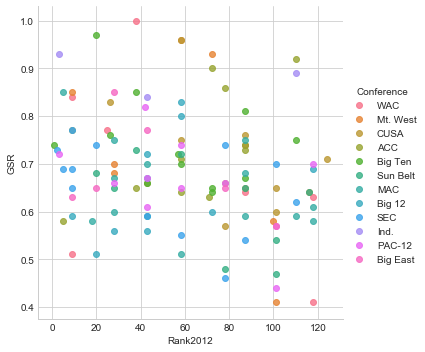

In [239]:
# Line plot of GSR by 2012 ranking
sns.lmplot(x='Rank2012', y='GSR', data=coach_rec_grad, fit_reg=False, hue='Conference')
plt.show()

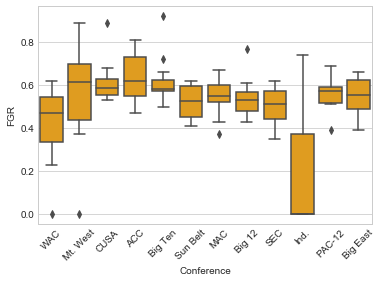

In [240]:
# Box plot of FGR by conference
g = sns.boxplot(x="Conference", y="FGR", data=coach_rec_grad, color = "orange")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

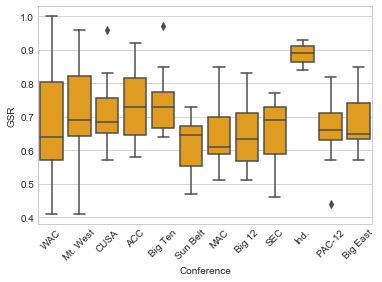

In [241]:
# Box plot of GSR by conference
g = sns.boxplot(x="Conference", y="GSR", data=coach_rec_grad, color = "orange")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

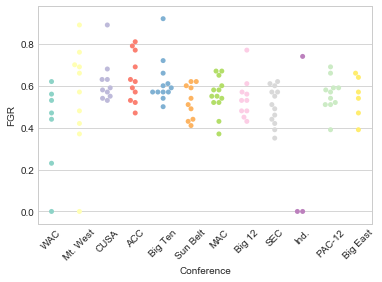

In [242]:
# Swarm Plot of FGR by conference
g = sns.swarmplot(x='Conference', y='FGR', data=coach_rec_grad, 
              palette="Set3")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

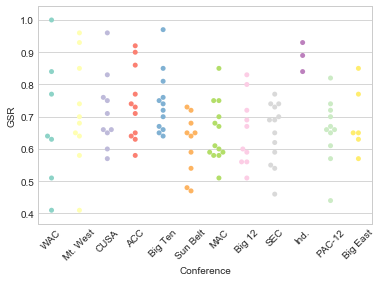

In [243]:
# Swarm Plot of GSR by conference
g = sns.swarmplot(x='Conference', y='GSR', data=coach_rec_grad, 
              palette="Set3")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

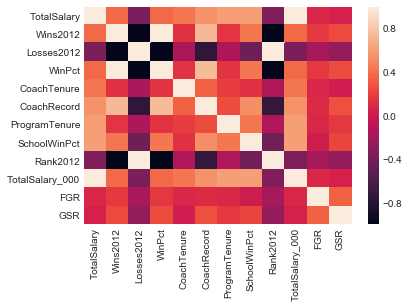

In [244]:
# HEATMAP

# Calculate correlations
corr = coach_rec_grad.corr()
 
# Heatmap
sns.heatmap(corr)
plt.show()

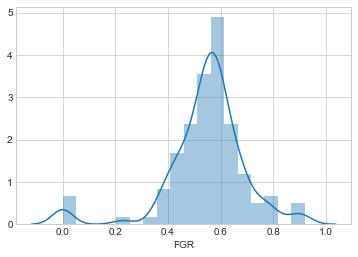

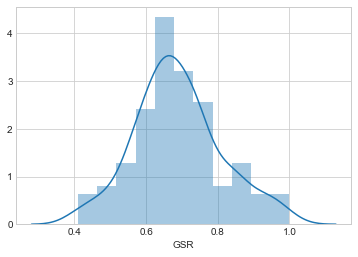

In [245]:
# HISTOGRAM

# Distribution Plot (a.k.a. Histogram)
sns.distplot(coach_rec_grad.FGR)
plt.show()

sns.distplot(coach_rec_grad.GSR)
plt.show()

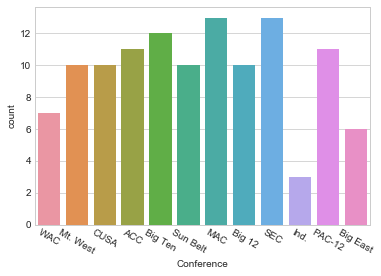

In [246]:
# Count of coaches in conference:
sns.countplot(x='Conference', data=coach_rec_grad)
plt.xticks(rotation=-30)
plt.show()

In [247]:
from scipy.stats import uniform # for training and testing
# employ training-and-test regimen for model validation
np.random.seed(1234)
coach_rec_grad['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coach))
coach_rec_grad_train = coach_rec_grad[coach_rec_grad['runiform'] >= 0.33]
coach_rec_grad_test = coach_rec_grad[coach_rec_grad['runiform'] < 0.33]
# check training data frame
print('\ncoach_rec_grad_train data frame (rows, columns): ',coach_rec_grad_train.shape)
print(coach_rec_grad_train.head())
# check test data frame
print('\ncoach_rec_grad_test data frame (rows, columns): ',coach_rec_grad_test.shape)
print(coach_rec_grad_test.head())

# specify a simple model with bobblehead entered last
my_model_rec_grad = str('TotalSalary ~ Conference + Wins2012 + Losses2012 + WinPct + CoachTenure + CoachRecord + \
               ProgramTenure + SchoolWinPct + Rank2012 + FGR + GSR')

# fit the model to the training set
train_model_fit_rec_grad = smf.ols(my_model_rec_grad, data = coach_rec_grad_train).fit()
# summary of model fit to the training set
print(train_model_fit_rec_grad.summary())
# training set predictions from the model fit to the training set
coach_rec_grad_train['predict_salary'] = train_model_fit_rec_grad.fittedvalues

# test set predictions from the model fit to the training set
coach_rec_grad_test['predict_salary'] = train_model_fit_rec_grad.predict(coach_rec_grad_test)


coach_rec_grad_train data frame (rows, columns):  (83, 16)
            Name         School Conference  TotalSalary  Wins2012  Losses2012  \
2  Gary Andersen     Utah State        WAC       415000      11.0         2.0   
3     Chris Ault         Nevada   Mt. West       493093       7.0         6.0   
4  David Bailiff           Rice       CUSA       608846       7.0         6.0   
5   Frank Beamer  Virginia Tech        ACC      2428000       7.0         6.0   
8   Bret Bielema      Wisconsin    Big Ten      2640140       8.0         6.0   

   WinPct  CoachTenure  CoachRecord  ProgramTenure  SchoolWinPct  Rank2012  \
2   0.846          4.0        0.520           98.0         0.490       9.0   
3   0.538         12.0        0.629           26.0         0.564      58.0   
4   0.538          6.0        0.405           99.0         0.433      58.0   
5   0.538         26.0        0.671          109.0         0.609      58.0   
8   0.571          7.0        0.739          121.0         0.57

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [248]:
# Load in coach data with stadium sizes and student population
coach_stad_pop = pd.read_csv('Coaches-stadium.csv', sep = ',', header=0)
print(coach_stad_pop.head())

            Name      School Conference     Salary OtherPay TotalSalary  \
0  Steve Addazio      Temple   Big East        NaN      NaN         NaN   
1      Robb Akey       Idaho        WAC  $375,797   $6,200    $381,997    
2  Gary Andersen  Utah State        WAC  $415,000       $0    $415,000    
3     Chris Ault      Nevada   Mt. West  $493,093       $0    $493,093    
4  David Bailiff        Rice       CUSA  $608,846       NaN   $608,846    

    MaxBonus  Arena Capacity  Student Body  
0        NaN           68,532       29,275  
1  $158,262            16,000        9,586  
2  $150,000            25,513       24,838  
3   $30,000            26,000       18,191  
4        NaN           47,000        3,893  


In [249]:
# Rename columns due to format issues upon upload
coach_stad_pop.rename(columns = {' Arena Capacity ':'StadiumSize'}, inplace = True)
coach_stad_pop.rename(columns = {'Student Body':'StudentPop'}, inplace = True)
coach_stad_pop.head()

,Name,School,Conference,Salary,OtherPay,TotalSalary,MaxBonus,StadiumSize,StudentPop
0,Steve Addazio,Temple,Big East,NaN,NaN,NaN,NaN,"68,532","29,275"
1,Robb Akey,Idaho,WAC,"$375,797","$6,200","$381,997","$158,262","16,000","9,586"
2,Gary Andersen,Utah State,WAC,"$415,000",$0,"$415,000","$150,000","25,513","24,838"
3,Chris Ault,Nevada,Mt. West,"$493,093",$0,"$493,093","$30,000","26,000","18,191"
4,David Bailiff,Rice,CUSA,"$608,846",NaN,"$608,846",NaN,"47,000","3,893"


In [250]:
# Drop Records with missing data
coach_stad_pop = coach_stad_pop[coach_stad_pop['TotalSalary'].notnull()]
coach_stad_pop.head()

,Name,School,Conference,Salary,OtherPay,TotalSalary,MaxBonus,StadiumSize,StudentPop
1,Robb Akey,Idaho,WAC,"$375,797","$6,200","$381,997","$158,262","16,000","9,586"
2,Gary Andersen,Utah State,WAC,"$415,000",$0,"$415,000","$150,000","25,513","24,838"
3,Chris Ault,Nevada,Mt. West,"$493,093",$0,"$493,093","$30,000","26,000","18,191"
4,David Bailiff,Rice,CUSA,"$608,846",NaN,"$608,846",NaN,"47,000","3,893"
5,Frank Beamer,Virginia Tech,ACC,"$2,343,000","$85,000","$2,428,000","$407,500","66,233","25,791"


In [251]:
# Cut unimportant columns from coach_grad:
cols_to_keep = ['Name', 'School', 'Conference', 'StadiumSize', 'StudentPop']
coach_stad_pop = coach_stad_pop[cols_to_keep]
print(coach_stad_pop.head())

            Name         School Conference StadiumSize StudentPop
1      Robb Akey          Idaho        WAC      16,000      9,586
2  Gary Andersen     Utah State        WAC      25,513     24,838
3     Chris Ault         Nevada   Mt. West      26,000     18,191
4  David Bailiff           Rice       CUSA      47,000      3,893
5   Frank Beamer  Virginia Tech        ACC      66,233     25,791


In [252]:
# Format data so it's usable (integers instead of character strings)
coach_stad_pop['StadiumSize'] = coach_stad_pop['StadiumSize'].str.replace(',','')
coach_stad_pop['StadiumSize'] = coach_stad_pop['StadiumSize'].str.strip()
coach_stad_pop['StadiumSize'] = pd.to_numeric(coach_stad_pop['StadiumSize'])
coach_stad_pop['StudentPop'] = coach_stad_pop['StudentPop'].str.replace(',','')
coach_stad_pop['StudentPop'] = coach_stad_pop['StudentPop'].str.strip()
coach_stad_pop['StudentPop'] = pd.to_numeric(coach_stad_pop['StudentPop'])
print(coach_stad_pop.head())
print(coach_stad_pop.describe())
print(coach_stad_pop.columns)

            Name         School Conference  StadiumSize  StudentPop
1      Robb Akey          Idaho        WAC        16000        9586
2  Gary Andersen     Utah State        WAC        25513       24838
3     Chris Ault         Nevada   Mt. West        26000       18191
4  David Bailiff           Rice       CUSA        47000        3893
5   Frank Beamer  Virginia Tech        ACC        66233       25791
         StadiumSize    StudentPop
count     116.000000    116.000000
mean    52525.310345  22245.051724
std     23634.101126  10276.242309
min     16000.000000   3893.000000
25%     30964.000000  15859.250000
50%     50000.000000  20807.500000
75%     65975.750000  28081.250000
max    107601.000000  55776.000000
Index(['Name', 'School', 'Conference', 'StadiumSize', 'StudentPop'], dtype='object')


In [253]:
# Merge data frames together for a final df
cols_to_keep1 = ['Name', 'School', 'Conference', 'TotalSalary', 'Wins2012', 'Losses2012',
       'WinPct', 'CoachTenure', 'CoachRecord', 'ProgramTenure', 'SchoolWinPct',
       'Rank2012', 'TotalSalary_000', 'FGR', 'GSR']
coach_final = coach_rec_grad[cols_to_keep1].join(coach_stad_pop.ix[:,'StadiumSize':])
coach_final.head()

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,Name,School,Conference,TotalSalary,Wins2012,Losses2012,WinPct,CoachTenure,CoachRecord,ProgramTenure,SchoolWinPct,Rank2012,TotalSalary_000,FGR,GSR,StadiumSize,StudentPop
1,Robb Akey,Idaho,WAC,381997,1.0,11.0,0.083,6.0,0.286,69.0,0.354,118.0,381.997,0.23,0.41,16000,9586
2,Gary Andersen,Utah State,WAC,415000,11.0,2.0,0.846,4.0,0.520,98.0,0.490,9.0,415.000,0.56,0.84,25513,24838
3,Chris Ault,Nevada,Mt. West,493093,7.0,6.0,0.538,12.0,0.629,26.0,0.564,58.0,493.093,0.89,0.96,26000,18191
4,David Bailiff,Rice,CUSA,608846,7.0,6.0,0.538,6.0,0.405,99.0,0.433,58.0,608.846,0.89,0.96,47000,3893
5,Frank Beamer,Virginia Tech,ACC,2428000,7.0,6.0,0.538,26.0,0.671,109.0,0.609,58.0,2428.000,0.62,0.71,66233,25791


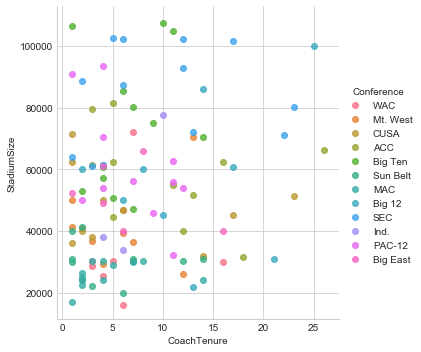

In [254]:
# Line plot of StadiumSize by coach tenure
sns.lmplot(x='CoachTenure', y='StadiumSize', data=coach_final, fit_reg=False, hue='Conference')
plt.show()

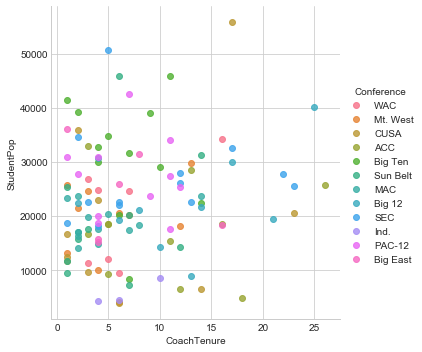

In [255]:
# Line plot of StudentPop by coach tenure
sns.lmplot(x='CoachTenure', y='StudentPop', data=coach_final, fit_reg=False, hue='Conference')
plt.show()

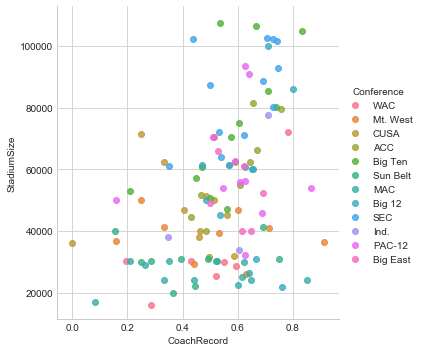

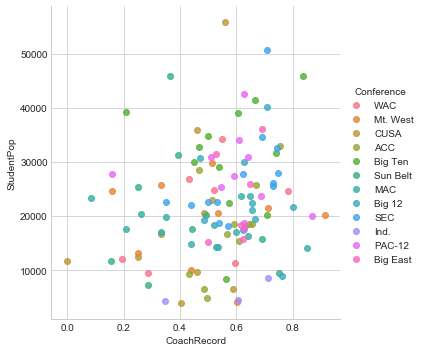

In [256]:
# Line plot of StadiumSize and StudentPop by coach record
sns.lmplot(x='CoachRecord', y='StadiumSize', data=coach_final, fit_reg=False, hue='Conference')
plt.show()
sns.lmplot(x='CoachRecord', y='StudentPop', data=coach_final, fit_reg=False, hue='Conference')
plt.show()

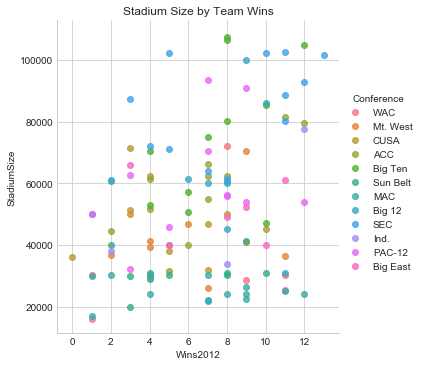

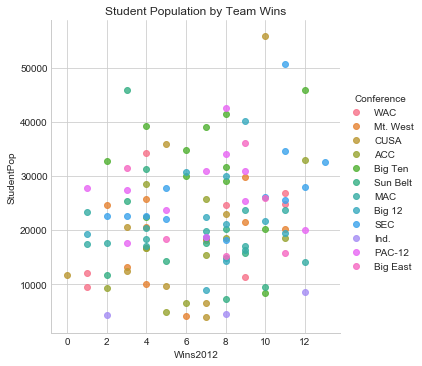

In [257]:
# Line plot of StadiumSize and Student Pop by wins in 2012
sns.lmplot(x='Wins2012', y='StadiumSize', data=coach_final, fit_reg=False, hue='Conference')
plt.title("Stadium Size by Team Wins")
plt.show()
sns.lmplot(x='Wins2012', y='StudentPop', data=coach_final, fit_reg=False, hue='Conference')
plt.title('Student Population by Team Wins')
plt.show()

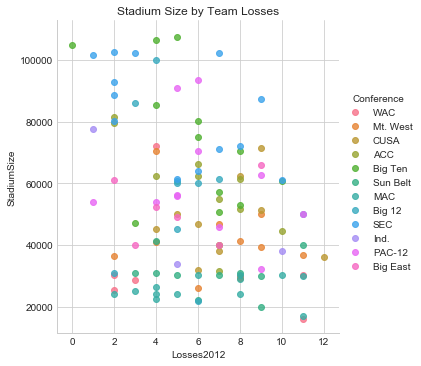

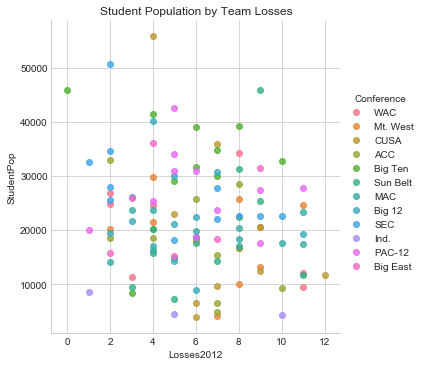

In [258]:
# Line plot of Stadium Size and Student Population by lossess
sns.lmplot(x='Losses2012', y='StadiumSize', data=coach_final, fit_reg=False, hue='Conference')
plt.title('Stadium Size by Team Losses')
plt.show()
sns.lmplot(x='Losses2012', y='StudentPop', data=coach_final, fit_reg=False, hue='Conference')
plt.title('Student Population by Team Losses')
plt.show()

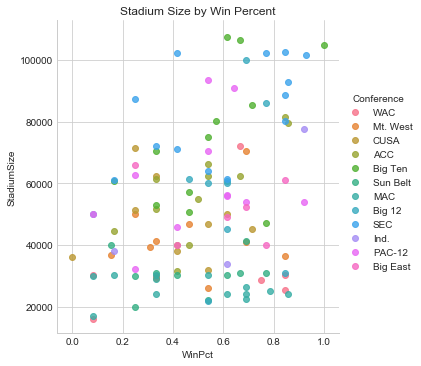

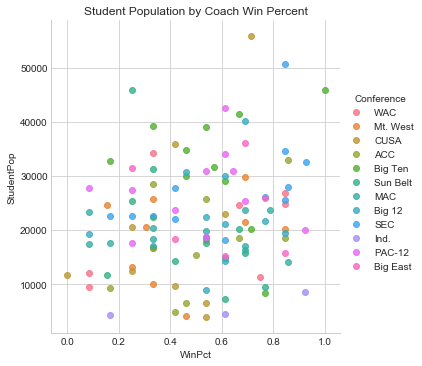

In [259]:
# Line plot of StadiumSize and Student Pop by win pct
sns.lmplot(x='WinPct', y='StadiumSize', data=coach_final, fit_reg=False, hue='Conference')
plt.title('Stadium Size by Win Percent')
plt.show()
sns.lmplot(x='WinPct', y='StudentPop', data=coach_final, fit_reg=False, hue='Conference')
plt.title('Student Population by Coach Win Percent')
plt.show()

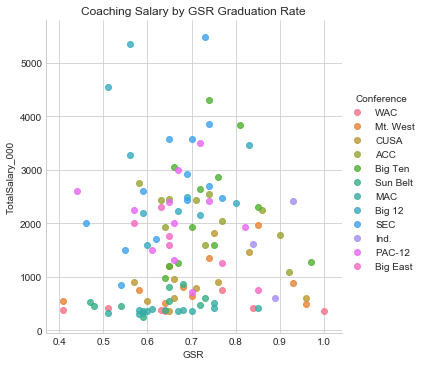

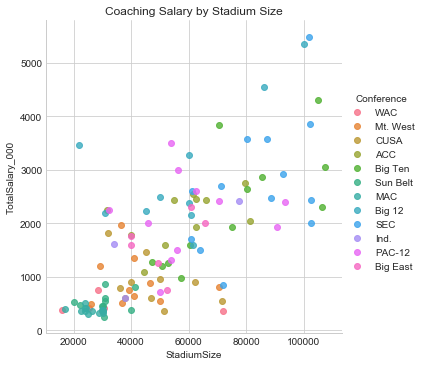

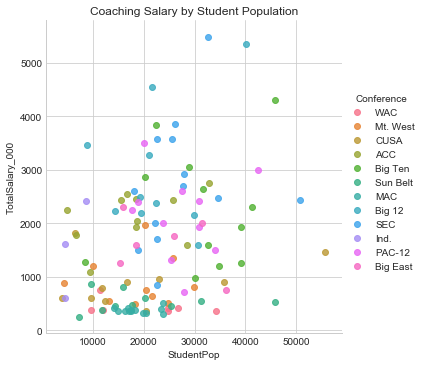

In [288]:
# Line plot of Stadium Size and Student Population by school win percentage
sns.lmplot(x='GSR', y='TotalSalary_000', data=coach_final, fit_reg=False, hue='Conference')
plt.title("Coaching Salary by GSR Graduation Rate")
plt.show()
sns.lmplot(x='StadiumSize', y='TotalSalary_000', data=coach_final, fit_reg=False, hue='Conference')
plt.title("Coaching Salary by Stadium Size")
plt.show()
sns.lmplot(x='StudentPop', y='TotalSalary_000', data=coach_final, fit_reg=False, hue='Conference')
plt.title("Coaching Salary by Student Population")
plt.show()

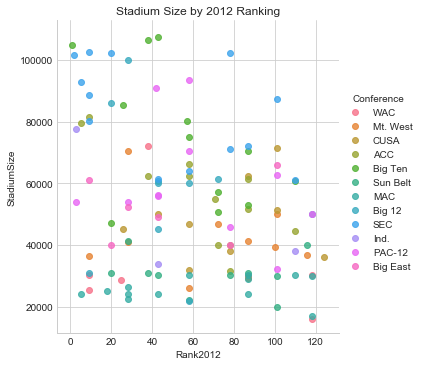

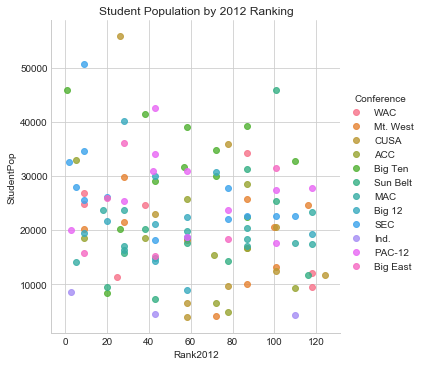

In [261]:
# Line plot of Stadium Size and Student Population by 2012 Ranking
sns.lmplot(x='Rank2012', y='StadiumSize', data=coach_final, fit_reg=False, hue='Conference')
plt.title("Stadium Size by 2012 Ranking")
plt.show()
sns.lmplot(x='Rank2012', y='StudentPop', data=coach_final, fit_reg=False, hue='Conference')
plt.title("Student Population by 2012 Ranking")
plt.show()

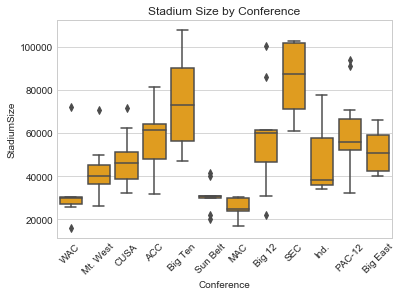

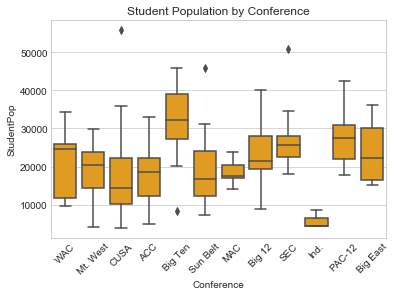

In [262]:
# Box plot of Stadium Size and Student Population by conference
g = sns.boxplot(x="Conference", y="StadiumSize", data=coach_final, color = "orange")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.title("Stadium Size by Conference")
plt.show()
g = sns.boxplot(x="Conference", y="StudentPop", data=coach_final, color = "orange")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.title("Student Population by Conference")
plt.show()

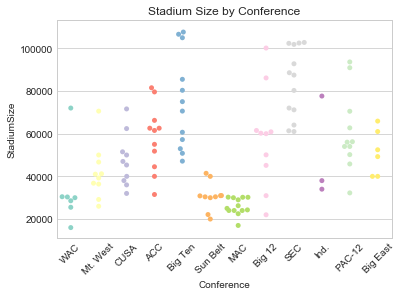

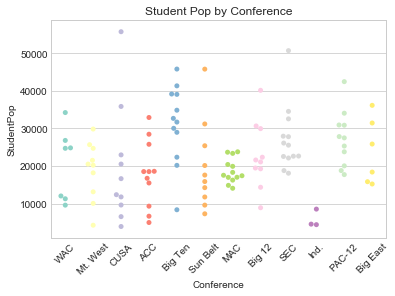

In [263]:
# Swarm Plot of Stadium Size and Student Populations by conference
g = sns.swarmplot(x='Conference', y='StadiumSize', data=coach_final, 
              palette="Set3")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.title("Stadium Size by Conference")
plt.show()
g = sns.swarmplot(x='Conference', y='StudentPop', data=coach_final, 
              palette="Set3")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.title("Student Pop by Conference")
plt.show()

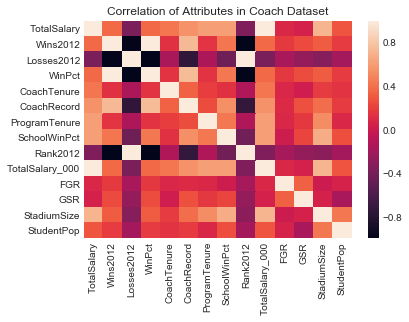

In [264]:
# HEATMAP

# Calculate correlations
corr = coach_final.corr()
 
# Heatmap
h = sns.heatmap(corr)
plt.title("Correlation of Attributes in Coach Dataset")
plt.show()

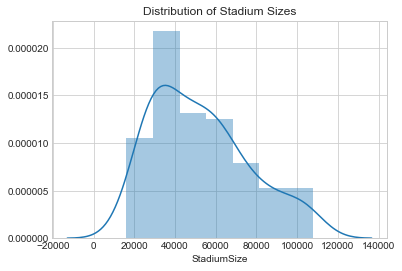

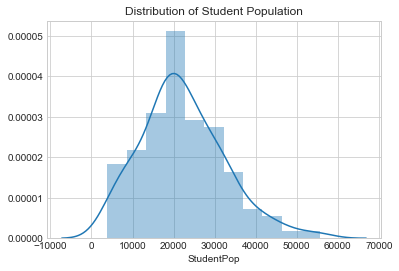

In [265]:
# HISTOGRAM

# Distribution Plot (a.k.a. Histogram)
sns.distplot(coach_final.StadiumSize)
plt.title("Distribution of Stadium Sizes")
plt.show()

sns.distplot(coach_final.StudentPop)
plt.title("Distribution of Student Population")
plt.show()

In [266]:
# Model on Final Dataset

from scipy.stats import uniform # for training and testing
# employ training-and-test regimen for model validation
np.random.seed(1234)
coach_final['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coach_final))
coach_final_train = coach_final[coach_final['runiform'] >= 0.33]
coach_final_test = coach_final[coach_final['runiform'] < 0.33]
# check training data frame
print('\ncoach_final_train data frame (rows, columns): ',coach_final_train.shape)
print(coach_final_train.head())
# check test data frame
print('\ncoach_final_test data frame (rows, columns): ',coach_final_test.shape)
print(coach_final_test.head())

# specify a simple model with bobblehead entered last
my_model_final = str('TotalSalary ~ Conference + Wins2012 + Losses2012 + WinPct + CoachTenure + CoachRecord + ProgramTenure + SchoolWinPct + Rank2012 + FGR + GSR + StadiumSize + StudentPop')

# fit the model to the training set
train_model_fit_final = smf.ols(my_model_final, data = coach_final).fit()
# summary of model fit to the training set
print(train_model_fit_final.summary())
# training set predictions from the model fit to the training set
coach_final_train['predict_salary'] = train_model_fit_final.fittedvalues

# test set predictions from the model fit to the training set
coach_final_test['predict_salary'] = train_model_fit_final.predict(coach_final_test)


coach_final_train data frame (rows, columns):  (83, 18)
            Name         School Conference  TotalSalary  Wins2012  Losses2012  \
2  Gary Andersen     Utah State        WAC       415000      11.0         2.0   
3     Chris Ault         Nevada   Mt. West       493093       7.0         6.0   
4  David Bailiff           Rice       CUSA       608846       7.0         6.0   
5   Frank Beamer  Virginia Tech        ACC      2428000       7.0         6.0   
8   Bret Bielema      Wisconsin    Big Ten      2640140       8.0         6.0   

   WinPct  CoachTenure  CoachRecord  ProgramTenure  SchoolWinPct  Rank2012  \
2   0.846          4.0        0.520           98.0         0.490       9.0   
3   0.538         12.0        0.629           26.0         0.564      58.0   
4   0.538          6.0        0.405           99.0         0.433      58.0   
5   0.538         26.0        0.671          109.0         0.609      58.0   
8   0.571          7.0        0.739          121.0         0.575  

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [267]:

model_nograd = str('TotalSalary ~  Conference + CoachTenure + CoachRecord + SchoolWinPct + StadiumSize + StudentPop')

# fit the model to the training set
train_model_fit_nograd = smf.ols(model_nograd, data = coach_final).fit()
# summary of model fit to the training set
print(train_model_fit_nograd.summary())
# training set predictions from the model fit to the training set
coach_final_train['predict_salary'] = train_model_fit_final.fittedvalues

# test set predictions from the model fit to the training set
coach_final_test['predict_salary'] = train_model_fit_final.predict(coach_final_test)

                            OLS Regression Results                            
Dep. Variable:            TotalSalary   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     20.55
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           1.42e-24
Time:                        12:51:29   Log-Likelihood:                -1699.6
No. Observations:                 116   AIC:                             3433.
Df Residuals:                      99   BIC:                             3480.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3.31

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [268]:
coach_final_test['predict_salary'].dtype

dtype('float64')

In [269]:
coach_final_test['predict_salary'] = coach_final_test['predict_salary'].astype('int64')
coach_final_test

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Name,School,Conference,TotalSalary,Wins2012,Losses2012,WinPct,CoachTenure,CoachRecord,ProgramTenure,SchoolWinPct,Rank2012,TotalSalary_000,FGR,GSR,StadiumSize,StudentPop,runiform,predict_salary
1,Robb Akey,Idaho,WAC,381997,1.0,11.0,0.083,6.0,0.286,69.0,0.354,118.0,381.997,0.23,0.41,16000,9586,0.191519,22463
6,Tim Beckman,Illinois,Big Ten,1600000,2.0,10.0,0.167,4.0,0.469,121.0,0.513,110.0,1600.000,0.59,0.75,60670,32695,0.272593,1799999
7,Todd Berry,Louisiana-Monroe,Sun Belt,250000,8.0,5.0,0.615,7.0,0.286,26.0,0.366,43.0,250.000,0.51,0.59,30427,7276,0.276464,466687
20,Dave Clawson,Bowling Green,MAC,364200,8.0,5.0,0.615,4.0,0.440,51.0,0.570,43.0,364.200,0.55,0.70,24000,14852,0.013768,357912
25,Mark Dantonio,Michigan State,Big Ten,1934250,7.0,6.0,0.538,9.0,0.605,88.0,0.596,58.0,1934.250,0.54,0.70,75005,39090,0.075381,2198306
31,Randy Edsall,Maryland,ACC,1604000,4.0,8.0,0.333,13.0,0.467,96.0,0.531,87.0,1604.000,0.63,0.73,51802,28472,0.316836,1904433
36,Larry Fedora,North Carolina,ACC,2448605,8.0,4.0,0.667,5.0,0.646,109.0,0.562,38.0,2448.605,0.52,0.65,62562,18523,0.143767,1993606
39,Pat Fitzgerald,Northwestern,Big Ten,1280751,10.0,3.0,0.769,7.0,0.562,119.0,0.438,20.0,1280.751,0.92,0.97,47130,8353,0.218792,1835426
44,Justin Fuente,Memphis,CUSA,903285,4.0,8.0,0.333,1.0,0.333,53.0,0.463,87.0,903.285,0.68,0.76,62380,16639,0.059809,874152
46,Todd Graham,Arizona State,PAC-12,3000000,8.0,5.0,0.615,7.0,0.626,79.0,0.622,43.0,3000.000,0.52,0.67,56232,42477,0.184287,1912094


In [270]:
# Create Data Frame where Syracuse is in the ACC
coach_acc = coach_final.copy()
coach_acc.at[74,'Conference'] = "ACC"
coach_acc.iloc[50:100] # checking the conference changed appropriately

,Name,School,Conference,TotalSalary,Wins2012,Losses2012,WinPct,CoachTenure,CoachRecord,ProgramTenure,SchoolWinPct,Rank2012,TotalSalary_000,FGR,GSR,StadiumSize,StudentPop,runiform
55,Danny Hope,Purdue,Big Ten,970000,6.0,7.0,0.462,4.0,0.449,121.0,0.532,72.0,970.000,0.57,0.64,57236,30043,0.111894
56,Mark Hudspeth,Louisiana-Lafayette,Sun Belt,803000,9.0,4.0,0.692,2.0,0.692,40.0,0.418,28.0,803.000,0.62,0.65,41426,15870,0.607194
57,Paul Johnson,Georgia Tech,ACC,2445700,7.0,7.0,0.500,11.0,0.610,111.0,0.606,71.0,2445.700,0.53,0.63,55000,15489,0.565945
58,Ellis Johnson,Southern Mississippi,CUSA,790000,0.0,12.0,0.000,1.0,0.000,50.0,0.574,124.0,790.000,0.59,0.71,36000,11779,0.006764
60,Butch Jones,Cincinnati,Big East,1769648,10.0,3.0,0.769,6.0,0.649,59.0,0.481,20.0,1769.648,0.57,0.65,40000,25860,0.617442
61,Joey Jones,South Alabama,Sun Belt,371125,2.0,11.0,0.154,1.0,0.154,1.0,0.154,116.0,371.125,0.44,0.64,40000,11755,0.912123
62,June Jones,Southern Methodist,CUSA,1825089,7.0,6.0,0.538,14.0,0.588,95.0,0.485,58.0,1825.089,0.63,0.75,32000,6521,0.790524
63,Brian Kelly,Notre Dame,Ind.,2424301,12.0,1.0,0.923,10.0,0.711,106.0,0.734,3.0,2424.301,0.74,0.93,77622,8530,0.992081
64,Chip Kelly,Oregon,PAC-12,3500000,12.0,1.0,0.923,4.0,0.868,95.0,0.551,3.0,3500.000,0.57,0.72,54000,20047,0.958802
65,Lane Kiffin,Southern California,PAC-12,2406505,7.0,6.0,0.538,4.0,0.627,91.0,0.716,58.0,2406.505,0.51,0.65,93607,18794,0.791964


In [271]:
# Modeling on conference set to ACC

from scipy.stats import uniform # for training and testing
# employ training-and-test regimen for model validation
np.random.seed(1234)
coach_acc['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coach_acc))
coach_acc_train = coach_acc[coach_acc['runiform'] >= 0.33]
coach_acc_test = coach_acc[coach_acc['runiform'] < 0.33]
# check training data frame
#print('\ncoach_acc_train data frame (rows, columns): ',coach_acc_train.shape)
#print(coach_acc.head())
# check test data frame
#print('\ncoach_acc_test data frame (rows, columns): ',coach_acc_test.shape)
#print(coach_acc_test.head())

# specify model w/ all variables
model_acc = str('TotalSalary ~ Conference + Wins2012 + Losses2012 + WinPct + CoachTenure + CoachRecord + ProgramTenure + SchoolWinPct + Rank2012+ FGR + GSR + StadiumSize + StudentPop')

# fit the model to the training set
train_model_acc_fit = smf.ols(model_acc, data = coach_acc).fit()
# summary of model fit to the training set
print(train_model_acc_fit.summary())
# training set predictions from the model fit to the training set
coach_acc_train['predict_salary'] = train_model_acc_fit.fittedvalues

# test set predictions from the model fit to the training set
coach_acc_test['predict_salary'] = train_model_acc_fit.predict(coach_acc_test)

                            OLS Regression Results                            
Dep. Variable:            TotalSalary   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     14.98
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           5.66e-22
Time:                        12:51:30   Log-Likelihood:                -1694.2
No. Observations:                 116   AIC:                             3436.
Df Residuals:                      92   BIC:                             3502.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.29

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [272]:
# Print the predicted values from the model above:
coach_acc_test['predict_salary'] = coach_acc_test['predict_salary'].astype('int64')
coach_acc_test

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,School,Conference,TotalSalary,Wins2012,Losses2012,WinPct,CoachTenure,CoachRecord,ProgramTenure,SchoolWinPct,Rank2012,TotalSalary_000,FGR,GSR,StadiumSize,StudentPop,runiform,predict_salary
1,Robb Akey,Idaho,WAC,381997,1.0,11.0,0.083,6.0,0.286,69.0,0.354,118.0,381.997,0.23,0.41,16000,9586,0.191519,25876
6,Tim Beckman,Illinois,Big Ten,1600000,2.0,10.0,0.167,4.0,0.469,121.0,0.513,110.0,1600.000,0.59,0.75,60670,32695,0.272593,1799941
7,Todd Berry,Louisiana-Monroe,Sun Belt,250000,8.0,5.0,0.615,7.0,0.286,26.0,0.366,43.0,250.000,0.51,0.59,30427,7276,0.276464,467431
20,Dave Clawson,Bowling Green,MAC,364200,8.0,5.0,0.615,4.0,0.440,51.0,0.570,43.0,364.200,0.55,0.70,24000,14852,0.013768,360296
25,Mark Dantonio,Michigan State,Big Ten,1934250,7.0,6.0,0.538,9.0,0.605,88.0,0.596,58.0,1934.250,0.54,0.70,75005,39090,0.075381,2189375
31,Randy Edsall,Maryland,ACC,1604000,4.0,8.0,0.333,13.0,0.467,96.0,0.531,87.0,1604.000,0.63,0.73,51802,28472,0.316836,1869993
36,Larry Fedora,North Carolina,ACC,2448605,8.0,4.0,0.667,5.0,0.646,109.0,0.562,38.0,2448.605,0.52,0.65,62562,18523,0.143767,1952329
39,Pat Fitzgerald,Northwestern,Big Ten,1280751,10.0,3.0,0.769,7.0,0.562,119.0,0.438,20.0,1280.751,0.92,0.97,47130,8353,0.218792,1832671
44,Justin Fuente,Memphis,CUSA,903285,4.0,8.0,0.333,1.0,0.333,53.0,0.463,87.0,903.285,0.68,0.76,62380,16639,0.059809,875493
46,Todd Graham,Arizona State,PAC-12,3000000,8.0,5.0,0.615,7.0,0.626,79.0,0.622,43.0,3000.000,0.52,0.67,56232,42477,0.184287,1900601


In [273]:
# specify model removing CoachRecord
model_acc2 = str('TotalSalary ~ Conference + Wins2012 + Losses2012 + WinPct + CoachTenure + ProgramTenure + SchoolWinPct + Rank2012+ FGR + GSR + StadiumSize + StudentPop')

# fit the model to the training set
train_model_acc2_fit = smf.ols(model_acc2, data = coach_acc).fit()
# summary of model fit to the training set
print(train_model_acc2_fit.summary())
# training set predictions from the model fit to the training set
coach_acc_train['predict_salary'] = train_model_acc2_fit.fittedvalues

# test set predictions from the model fit to the training set
coach_acc_test['predict_salary'] = train_model_acc2_fit.predict(coach_acc_test)

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


                            OLS Regression Results                            
Dep. Variable:            TotalSalary   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     15.40
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           3.64e-22
Time:                        12:51:30   Log-Likelihood:                -1695.5
No. Observations:                 116   AIC:                             3437.
Df Residuals:                      93   BIC:                             3500.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                5.6

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [274]:
# specify model removing ProgramTenure, FGR, GSR, SchoolWinPCT and StudentPop
model_acc3 = str('TotalSalary ~ Conference + Wins2012 + Losses2012 + WinPct + CoachTenure + Rank2012 + StadiumSize')

# fit the model to the training set
train_model_acc3_fit = smf.ols(model_acc3, data = coach_acc).fit()
# summary of model fit to the training set
print(train_model_acc3_fit.summary())
# training set predictions from the model fit to the training set
coach_acc_train['predict_salary'] = train_model_acc3_fit.fittedvalues

# test set predictions from the model fit to the training set
coach_acc_test['predict_salary'] = train_model_acc3_fit.predict(coach_acc_test)

                            OLS Regression Results                            
Dep. Variable:            TotalSalary   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     19.45
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           3.74e-24
Time:                        12:51:30   Log-Likelihood:                -1698.9
No. Observations:                 116   AIC:                             3434.
Df Residuals:                      98   BIC:                             3483.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               7.33

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [275]:
# Print the predicted values from the model above:
coach_acc_test['predict_salary'] = coach_acc_test['predict_salary'].astype('int64')
coach_acc_test

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,School,Conference,TotalSalary,Wins2012,Losses2012,WinPct,CoachTenure,CoachRecord,ProgramTenure,SchoolWinPct,Rank2012,TotalSalary_000,FGR,GSR,StadiumSize,StudentPop,runiform,predict_salary
1,Robb Akey,Idaho,WAC,381997,1.0,11.0,0.083,6.0,0.286,69.0,0.354,118.0,381.997,0.23,0.41,16000,9586,0.191519,-179943
6,Tim Beckman,Illinois,Big Ten,1600000,2.0,10.0,0.167,4.0,0.469,121.0,0.513,110.0,1600.000,0.59,0.75,60670,32695,0.272593,1770668
7,Todd Berry,Louisiana-Monroe,Sun Belt,250000,8.0,5.0,0.615,7.0,0.286,26.0,0.366,43.0,250.000,0.51,0.59,30427,7276,0.276464,571312
20,Dave Clawson,Bowling Green,MAC,364200,8.0,5.0,0.615,4.0,0.440,51.0,0.570,43.0,364.200,0.55,0.70,24000,14852,0.013768,263887
25,Mark Dantonio,Michigan State,Big Ten,1934250,7.0,6.0,0.538,9.0,0.605,88.0,0.596,58.0,1934.250,0.54,0.70,75005,39090,0.075381,2243609
31,Randy Edsall,Maryland,ACC,1604000,4.0,8.0,0.333,13.0,0.467,96.0,0.531,87.0,1604.000,0.63,0.73,51802,28472,0.316836,1985736
36,Larry Fedora,North Carolina,ACC,2448605,8.0,4.0,0.667,5.0,0.646,109.0,0.562,38.0,2448.605,0.52,0.65,62562,18523,0.143767,1947688
39,Pat Fitzgerald,Northwestern,Big Ten,1280751,10.0,3.0,0.769,7.0,0.562,119.0,0.438,20.0,1280.751,0.92,0.97,47130,8353,0.218792,1975674
44,Justin Fuente,Memphis,CUSA,903285,4.0,8.0,0.333,1.0,0.333,53.0,0.463,87.0,903.285,0.68,0.76,62380,16639,0.059809,941178
46,Todd Graham,Arizona State,PAC-12,3000000,8.0,5.0,0.615,7.0,0.626,79.0,0.622,43.0,3000.000,0.52,0.67,56232,42477,0.184287,1981383


In [276]:
# Create Data Frame where Syracuse is in the Big Ten
coach_big10 = coach_final.copy()
coach_big10.at[74,'Conference'] = "Big Ten"
#coach_big10.iloc[50:100] # checking the conference changed appropriately

In [277]:
# Modeling on conference set to Big Ten

from scipy.stats import uniform # for training and testing
# employ training-and-test regimen for model validation
np.random.seed(1234)
coach_big10['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coach_big10))
coach_big10_train = coach_big10[coach_big10['runiform'] >= 0.33]
coach_big10_test = coach_big10[coach_big10['runiform'] < 0.33]
# check training data frame
#print('\ncoach_big10 data frame (rows, columns): ',coach_big10_train.shape)
#print(coach_big10.head())
# check test data frame
#print('\ncoach_big10_test data frame (rows, columns): ',coach_big10_test.shape)
#print(coach_big10_test.head())

# specify model w/ all variables
model_big10 = str('TotalSalary ~ Conference + Wins2012 + Losses2012 + WinPct + CoachTenure + CoachRecord + ProgramTenure + SchoolWinPct + Rank2012+ FGR + GSR + StadiumSize + StudentPop')

# fit the model to the training set
train_model_big10_fit = smf.ols(model_big10, data = coach_big10).fit()
# summary of model fit to the training set
print(train_model_big10_fit.summary())
# training set predictions from the model fit to the training set
coach_big10_train['predict_salary'] = train_model_big10_fit.fittedvalues

# test set predictions from the model fit to the training set
coach_big10_test['predict_salary'] = train_model_big10_fit.predict(coach_big10_test)

                            OLS Regression Results                            
Dep. Variable:            TotalSalary   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     14.95
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           6.09e-22
Time:                        12:51:31   Log-Likelihood:                -1694.3
No. Observations:                 116   AIC:                             3437.
Df Residuals:                      92   BIC:                             3503.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.18

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [278]:
# specify model removing CoachRecord, ProgramTenure, SchoolWinPct, FGR, GSR, and StudentPop
model2_big10 = str('TotalSalary ~  Conference + Wins2012 + Losses2012 + WinPct + CoachTenure + Rank2012 + StadiumSize')

# fit the model to the training set
train_model2_big10_fit = smf.ols(model2_big10, data = coach_big10).fit()
# summary of model fit to the training set
print(train_model2_big10_fit.summary())
# training set predictions from the model fit to the training set
coach_big10_train['predict_salary'] = train_model2_big10_fit.fittedvalues

# test set predictions from the model fit to the training set
coach_big10_test['predict_salary'] = train_model2_big10_fit.predict(coach_big10_test)

                            OLS Regression Results                            
Dep. Variable:            TotalSalary   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     19.44
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           3.81e-24
Time:                        12:51:31   Log-Likelihood:                -1698.9
No. Observations:                 116   AIC:                             3434.
Df Residuals:                      98   BIC:                             3483.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               7.29

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [279]:
# Print the predicted values from the model above:
coach_big10_test['predict_salary'] = coach_big10_test['predict_salary'].astype('int64')
coach_big10_test

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,School,Conference,TotalSalary,Wins2012,Losses2012,WinPct,CoachTenure,CoachRecord,ProgramTenure,SchoolWinPct,Rank2012,TotalSalary_000,FGR,GSR,StadiumSize,StudentPop,runiform,predict_salary
1,Robb Akey,Idaho,WAC,381997,1.0,11.0,0.083,6.0,0.286,69.0,0.354,118.0,381.997,0.23,0.41,16000,9586,0.191519,-184556
6,Tim Beckman,Illinois,Big Ten,1600000,2.0,10.0,0.167,4.0,0.469,121.0,0.513,110.0,1600.000,0.59,0.75,60670,32695,0.272593,1738620
7,Todd Berry,Louisiana-Monroe,Sun Belt,250000,8.0,5.0,0.615,7.0,0.286,26.0,0.366,43.0,250.000,0.51,0.59,30427,7276,0.276464,570263
20,Dave Clawson,Bowling Green,MAC,364200,8.0,5.0,0.615,4.0,0.440,51.0,0.570,43.0,364.200,0.55,0.70,24000,14852,0.013768,264384
25,Mark Dantonio,Michigan State,Big Ten,1934250,7.0,6.0,0.538,9.0,0.605,88.0,0.596,58.0,1934.250,0.54,0.70,75005,39090,0.075381,2214171
31,Randy Edsall,Maryland,ACC,1604000,4.0,8.0,0.333,13.0,0.467,96.0,0.531,87.0,1604.000,0.63,0.73,51802,28472,0.316836,2013451
36,Larry Fedora,North Carolina,ACC,2448605,8.0,4.0,0.667,5.0,0.646,109.0,0.562,38.0,2448.605,0.52,0.65,62562,18523,0.143767,1981979
39,Pat Fitzgerald,Northwestern,Big Ten,1280751,10.0,3.0,0.769,7.0,0.562,119.0,0.438,20.0,1280.751,0.92,0.97,47130,8353,0.218792,1938616
44,Justin Fuente,Memphis,CUSA,903285,4.0,8.0,0.333,1.0,0.333,53.0,0.463,87.0,903.285,0.68,0.76,62380,16639,0.059809,947326
46,Todd Graham,Arizona State,PAC-12,3000000,8.0,5.0,0.615,7.0,0.626,79.0,0.622,43.0,3000.000,0.52,0.67,56232,42477,0.184287,1980526


In [282]:
print(coach_final)

                 Name                  School Conference  TotalSalary  \
1           Robb Akey                   Idaho        WAC       381997   
2       Gary Andersen              Utah State        WAC       415000   
3          Chris Ault                  Nevada   Mt. West       493093   
4       David Bailiff                    Rice       CUSA       608846   
5        Frank Beamer           Virginia Tech        ACC      2428000   
6         Tim Beckman                Illinois    Big Ten      1600000   
7          Todd Berry        Louisiana-Monroe   Sun Belt       250000   
8        Bret Bielema               Wisconsin    Big Ten      2640140   
9      Larry Blakeney                    Troy   Sun Belt       455000   
11       Terry Bowden                   Akron        MAC       375000   
12         Art Briles                  Baylor     Big 12      2232807   
13         Mack Brown                   Texas     Big 12      5353750   
14       Troy Calhoun               Air Force   Mt.

In [284]:
coach_final.shape

(116, 18)

In [286]:
list(coach_final)

['Name',
 'School',
 'Conference',
 'TotalSalary',
 'Wins2012',
 'Losses2012',
 'WinPct',
 'CoachTenure',
 'CoachRecord',
 'ProgramTenure',
 'SchoolWinPct',
 'Rank2012',
 'TotalSalary_000',
 'FGR',
 'GSR',
 'StadiumSize',
 'StudentPop',
 'runiform']

In [289]:
# Modeling on conference set to Big East

from scipy.stats import uniform # for training and testing
# employ training-and-test regimen for model validation
np.random.seed(1234)
coach_final['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coach_final))
coach_final_train = coach_final[coach_final['runiform'] >= 0.33]
coach_final_test = coach_final[coach_final['runiform'] < 0.33]

# specify model removing CoachRecord, ProgramTenure, SchoolWinPct, FGR, GSR, and StudentPop
model_bigeast = str('TotalSalary ~  Conference + Wins2012 + Losses2012 + WinPct + CoachTenure + Rank2012 + StadiumSize')

# fit the model to the training set
train_model_bigeast_fit = smf.ols(model_bigeast, data = coach_final).fit()
# summary of model fit to the training set
print(train_model_bigeast_fit.summary())
# training set predictions from the model fit to the training set
coach_final_train['predict_salary'] = train_model_bigeast_fit.fittedvalues

# test set predictions from the model fit to the training set
coach_final_test['predict_salary'] = train_model_bigeast_fit.predict(coach_final_test)

                            OLS Regression Results                            
Dep. Variable:            TotalSalary   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     19.53
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           3.22e-24
Time:                        14:11:31   Log-Likelihood:                -1698.7
No. Observations:                 116   AIC:                             3433.
Df Residuals:                      98   BIC:                             3483.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               7.38

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [290]:
# Print the predicted values from the model above:
coach_final_test['predict_salary'] = coach_final_test['predict_salary'].astype('int64')
coach_final_test

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,School,Conference,TotalSalary,Wins2012,Losses2012,WinPct,CoachTenure,CoachRecord,ProgramTenure,SchoolWinPct,Rank2012,TotalSalary_000,FGR,GSR,StadiumSize,StudentPop,runiform,predict_salary
1,Robb Akey,Idaho,WAC,381997,1.0,11.0,0.083,6.0,0.286,69.0,0.354,118.0,381.997,0.23,0.41,16000,9586,0.191519,-180433
6,Tim Beckman,Illinois,Big Ten,1600000,2.0,10.0,0.167,4.0,0.469,121.0,0.513,110.0,1600.000,0.59,0.75,60670,32695,0.272593,1770853
7,Todd Berry,Louisiana-Monroe,Sun Belt,250000,8.0,5.0,0.615,7.0,0.286,26.0,0.366,43.0,250.000,0.51,0.59,30427,7276,0.276464,573887
20,Dave Clawson,Bowling Green,MAC,364200,8.0,5.0,0.615,4.0,0.440,51.0,0.570,43.0,364.200,0.55,0.70,24000,14852,0.013768,267144
25,Mark Dantonio,Michigan State,Big Ten,1934250,7.0,6.0,0.538,9.0,0.605,88.0,0.596,58.0,1934.250,0.54,0.70,75005,39090,0.075381,2242800
31,Randy Edsall,Maryland,ACC,1604000,4.0,8.0,0.333,13.0,0.467,96.0,0.531,87.0,1604.000,0.63,0.73,51802,28472,0.316836,2014236
36,Larry Fedora,North Carolina,ACC,2448605,8.0,4.0,0.667,5.0,0.646,109.0,0.562,38.0,2448.605,0.52,0.65,62562,18523,0.143767,1985355
39,Pat Fitzgerald,Northwestern,Big Ten,1280751,10.0,3.0,0.769,7.0,0.562,119.0,0.438,20.0,1280.751,0.92,0.97,47130,8353,0.218792,1983593
44,Justin Fuente,Memphis,CUSA,903285,4.0,8.0,0.333,1.0,0.333,53.0,0.463,87.0,903.285,0.68,0.76,62380,16639,0.059809,941519
46,Todd Graham,Arizona State,PAC-12,3000000,8.0,5.0,0.615,7.0,0.626,79.0,0.622,43.0,3000.000,0.52,0.67,56232,42477,0.184287,1985893


In [294]:
# Modeling on no conference


# specify model removing CoachRecord, ProgramTenure, SchoolWinPct, FGR, GSR, and StudentPop
model_noconf = str('TotalSalary ~ Wins2012 + CoachTenure + StadiumSize')

# fit the model to the training set
train_model_noconf_fit = smf.ols(model_noconf, data = coach_final).fit()
# summary of model fit to the training set
print(train_model_noconf_fit.summary())
# training set predictions from the model fit to the training set
coach_final_train['predict_salary'] = train_model_noconf_fit.fittedvalues

# test set predictions from the model fit to the training set
coach_final_test['predict_salary'] = train_model_noconf_fit.predict(coach_final_test)

                            OLS Regression Results                            
Dep. Variable:            TotalSalary   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     59.60
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           4.19e-23
Time:                        14:28:53   Log-Likelihood:                -1729.2
No. Observations:                 116   AIC:                             3466.
Df Residuals:                     112   BIC:                             3477.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.539e+05   1.99e+05     -3.785      

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [295]:
coach_final_test['predict_salary'] = coach_final_test['predict_salary'].astype('int64')
coach_final_test

/Users/nathanielhoffelmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Name,School,Conference,TotalSalary,Wins2012,Losses2012,WinPct,CoachTenure,CoachRecord,ProgramTenure,SchoolWinPct,Rank2012,TotalSalary_000,FGR,GSR,StadiumSize,StudentPop,runiform,predict_salary
1,Robb Akey,Idaho,WAC,381997,1.0,11.0,0.083,6.0,0.286,69.0,0.354,118.0,381.997,0.23,0.41,16000,9586,0.191519,127038
6,Tim Beckman,Illinois,Big Ten,1600000,2.0,10.0,0.167,4.0,0.469,121.0,0.513,110.0,1600.000,0.59,0.75,60670,32695,0.272593,1413892
7,Todd Berry,Louisiana-Monroe,Sun Belt,250000,8.0,5.0,0.615,7.0,0.286,26.0,0.366,43.0,250.000,0.51,0.59,30427,7276,0.276464,974498
20,Dave Clawson,Bowling Green,MAC,364200,8.0,5.0,0.615,4.0,0.440,51.0,0.570,43.0,364.200,0.55,0.70,24000,14852,0.013768,606852
25,Mark Dantonio,Michigan State,Big Ten,1934250,7.0,6.0,0.538,9.0,0.605,88.0,0.596,58.0,1934.250,0.54,0.70,75005,39090,0.075381,2388534
31,Randy Edsall,Maryland,ACC,1604000,4.0,8.0,0.333,13.0,0.467,96.0,0.531,87.0,1604.000,0.63,0.73,51802,28472,0.316836,1765863
36,Larry Fedora,North Carolina,ACC,2448605,8.0,4.0,0.667,5.0,0.646,109.0,0.562,38.0,2448.605,0.52,0.65,62562,18523,0.143767,1831560
39,Pat Fitzgerald,Northwestern,Big Ten,1280751,10.0,3.0,0.769,7.0,0.562,119.0,0.438,20.0,1280.751,0.92,0.97,47130,8353,0.218792,1580875
44,Justin Fuente,Memphis,CUSA,903285,4.0,8.0,0.333,1.0,0.333,53.0,0.463,87.0,903.285,0.68,0.76,62380,16639,0.059809,1393392
46,Todd Graham,Arizona State,PAC-12,3000000,8.0,5.0,0.615,7.0,0.626,79.0,0.622,43.0,3000.000,0.52,0.67,56232,42477,0.184287,1755429
